In [83]:
import numpy as np
import cv2
import pandas as pd
import glob
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

## Functions
I prefer to have the functions all at the top of my notebook

In [155]:
def boundingBoxFromXML(path):
    '''takes and XML file path, returns the four corners of a bounding box
        depends on python xml 
        import xml.etree.ElementTree as ET
    '''
    
    #import the xml file and set a root
    tree = ET.parse(path)
    root = tree.getroot()
    
    #navigate to the bounding box
    root = root.find('object')    
    root = root.find('bndbox')
    
    #get the corners, order is xmin, ymin, xmax, ymax
    output = []
    for child in root:
        output.append( int(child.text) )
        
    return output

def getColorHistogram(image, channel):
    
    return None

## Read in ship images
Note here the image is a larger image with a single ship in it. I use the associated xml file to get the bounding box and then crop out a smaller image with a ship in it. 

In [145]:
#first read the image file paths
shipImagePaths = glob.glob("MASATI-v2/ship/*.png")

#next read the xml label file paths
shipLabelPaths = glob.glob("MASATI-v2/ship_labels/*.xml")

#container for ship images
imagesOfShips = []

#next loop over all the images and parse the XML file along the way
for i in range(100):  #for now just 100 images
    
    #read the image with opencv
    image = cv2.imread(shipImagePaths[i])
    
    #parse the XML file to get the bounding box
    box = boundingBoxFromXML(shipLabelPaths[i])
    
    #crop out the ship using numpy
    imageCropped = image[box[1]:box[3], box[0]:box[2]] #[y:y+h, x:x+w] 
    
    #record the image
    imagesOfShips.append(imageCropped)

## Some vis
Here I plot 36 random ships to get an idea what they look like in these image thumbnails

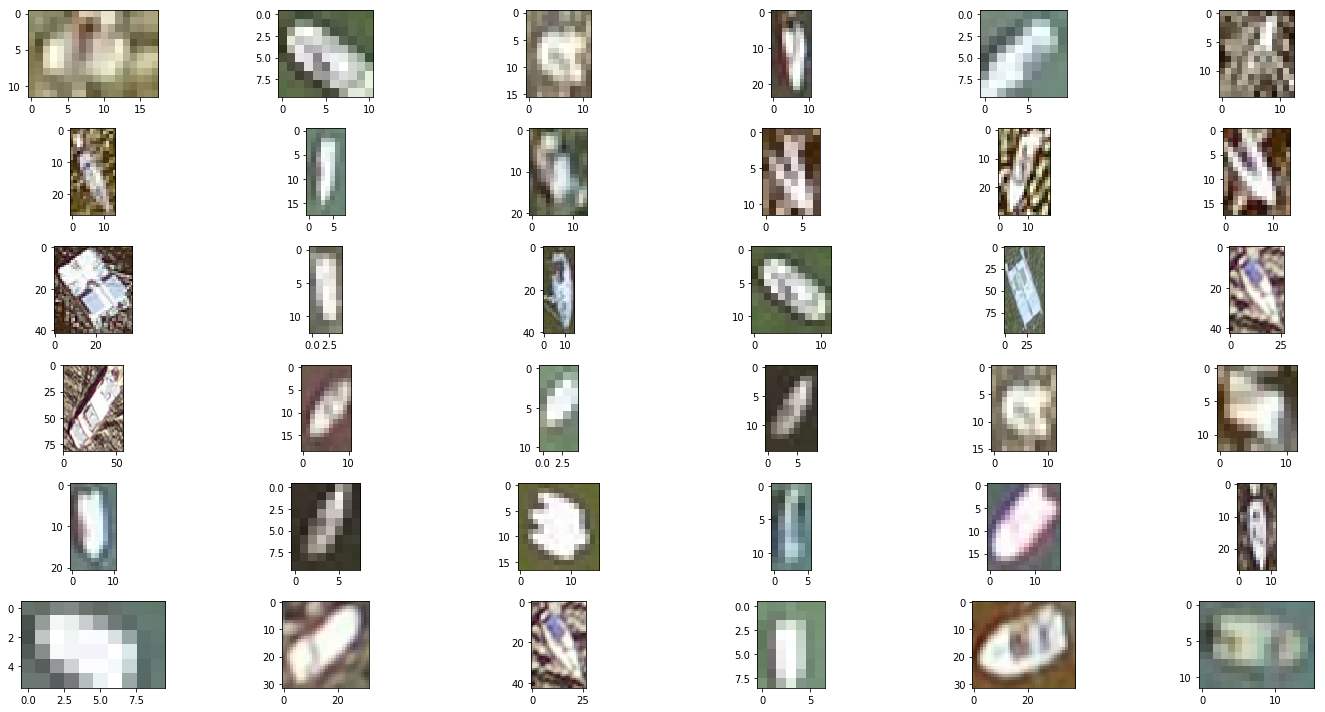

In [154]:
#plt subplot setup
fig, axs = plt.subplots(6, 6, figsize=(20, 10)) 

#loop to plot some random images for visulaztion purposes
for i in range(6):
    for j in range(6):
        axs[i, j].imshow(imagesOfShips[np.random.randint(len(imagesOfShips))])
    
plt.tight_layout()
plt.show()